### Try Model: Multiple Linear Regression

In [1]:
from Starts.startmodskl import *

local_kwargs {'nan_mean_neighbors': False, 'data_path_2': '2_Titanic/data/titanic_no_nan.csv', 'nan_mean': True, 'data_path_1': '2_Titanic/data/train.csv', 'nan_drop_row': False, 'nan_zero': False, 'drop_obj_col': False, 'data_path_3': '2_Titanic/data/test.csv', 'nan_drop_col': False}


In [2]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0,3,1,49.0,574,0.0000,5,0
1,1,2,0,7.0,571,26.2500,4,2
2,0,3,1,33.0,378,8.6625,5,0
3,0,3,1,24.0,519,24.1500,5,2
4,1,1,0,30.0,0,86.5000,4,0


In [3]:
# proceed feature_selection to choose and keep the features which have the most impact and remove the unnecessary data
nonan_data = StartMod.feature_selection(nonan_data, ['Pclass', 'Ticket', 'Fare', 'Sex'], dependent_label='Survived', rm=False)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Title',
       'FamilySize'],
      dtype='object')

RSquared:  0.5352544351130721

Adj_RSquared:  0.5315743231739223

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     145.4
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          2.13e-142
Time:                        16:50:39   Log-Likelihood:                -496.32
No. Observations:                 891   AIC:                             1007.
Df Residuals:                     884   BIC:                             1040.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std

#### Since we attempt to keep R_Squared close as 1 as possible. By removing features 'Ticket', 'Pclass', R_Squared are not nearly changed but removing the features 'Fare' and 'Sex', R_Squared decreased strongly. So we decide to remove the features 'Ticket' and 'Pclass' because these features have very small impact on dataset and also reduce the unnecessary data processing

In [4]:
func = lambda col: nonan_data.drop(col, axis=1)
nonan_data = func(['Pclass', 'Ticket'])
nonan_data.head()

,Survived,Sex,Age,Fare,Title,FamilySize
0,0,1,49.0,0.0000,5,0
1,1,0,7.0,26.2500,4,2
2,0,1,33.0,8.6625,5,0
3,0,1,24.0,24.1500,5,2
4,1,0,30.0,86.5000,4,0


x_value is optimal with p_value:  0.0456494393379287

R_Squared:  0.346316387836776

Adjusted_R_Squared:  0.34262326008444133

Summary:                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     93.77
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           2.88e-79
Time:                        16:50:39   Log-Likelihood:                -432.57
No. Observations:                 891   AIC:                             877.1
Df Residuals:                     885   BIC:                             905.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

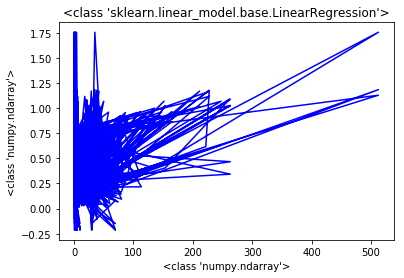

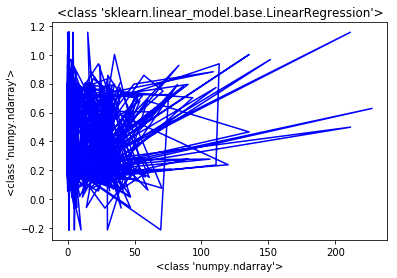

In [5]:
regressor, y_true, y_pred = StartModSKL.regression_multi_linear(nonan_data, 'Survived')

In [6]:
(y_pred > 1).any(), (y_pred < 0).any()

(True, True)

In [7]:
# Since this is regression model, we expect to have many numeric values.
# Convert the predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([1 if item > 0.5 else 0 for item in y_pred ])
len(y_true), len(y_pred)

(179, 179)

In [8]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.88      0.85       115
          1       0.75      0.66      0.70        64

avg / total       0.80      0.80      0.80       179

Confusion Matrix: 
 [[101  14]
 [ 22  42]]

Accuracy: 
 0.7988826815642458


### Result: 
#### the correct predicted result 143, 
#### the wrong predicted result 36